# Assignment - 06 (Logistic Regression)

Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank-full.csv',sep = ";",engine="python",error_bad_lines=False)
df.head()

Skipping line 2581: unexpected end of data


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### EDA

In [3]:
# Dropping unwanted columns
df.drop(["marital","month","poutcome"],axis=1,inplace=True)

In [4]:
df.columns

Index(['age', 'job', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y'],
      dtype='object')

In [5]:
# Datatypes and null values in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        2579 non-null   int64 
 1   job        2579 non-null   object
 2   education  2579 non-null   object
 3   default    2579 non-null   object
 4   balance    2579 non-null   int64 
 5   housing    2579 non-null   object
 6   loan       2579 non-null   object
 7   contact    2579 non-null   object
 8   day        2579 non-null   int64 
 9   duration   2579 non-null   int64 
 10  campaign   2579 non-null   int64 
 11  pdays      2579 non-null   int64 
 12  previous   2579 non-null   int64 
 13  y          2579 non-null   object
dtypes: int64(7), object(7)
memory usage: 282.2+ KB


In [6]:
# unique values in columns
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
df['job'] = LE.fit_transform(df['job'])
df['education'] = LE.fit_transform(df['education'])
df['default'] = LE.fit_transform(df['default'])
df['housing'] = LE.fit_transform(df['housing'])
df['loan'] = LE.fit_transform(df['loan'])
df['contact'] = LE.fit_transform(df['contact'])
df['y'] = LE.fit_transform(df['y'])

In [8]:
# replacing values
#df["default"]=df["default"].replace({'yes':1, 'no':0})
#df["housing"]=df["housing"].replace({'yes':1, 'no':0})
#df["loan"]=df["loan"].replace({'yes':1, 'no':0})
#df["loan"]=df["loan"].replace({'yes':1, 'no':0})
#df["y"]=df["y"].replace({'yes':1, 'no':0})

In [9]:
df.describe()

,age,job,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,y
count,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.0,2579.000000,2579.000000,2579.000000,2579.0,2579.0,2579.000000
mean,40.103528,3.759597,1.117100,0.025204,604.582396,0.892206,0.132222,0.0,8.221404,265.151221,1.994572,-1.0,0.0,0.023653
std,9.449703,3.336968,0.782527,0.156773,2070.484054,0.310180,0.338797,0.0,2.534982,259.065011,1.342150,0.0,0.0,0.151994
min,20.000000,0.000000,0.000000,0.000000,-3313.000000,0.000000,0.000000,0.0,5.000000,2.000000,1.000000,-1.0,0.0,0.000000
25%,32.000000,1.000000,1.000000,0.000000,29.000000,1.000000,0.000000,0.0,6.000000,123.000000,1.000000,-1.0,0.0,0.000000
50%,39.000000,3.000000,1.000000,0.000000,199.000000,1.000000,0.000000,0.0,8.000000,194.000000,2.000000,-1.0,0.0,0.000000
75%,47.000000,7.000000,1.000000,0.000000,527.000000,1.000000,0.000000,0.0,9.000000,311.000000,2.000000,-1.0,0.0,0.000000
max,61.000000,11.000000,3.000000,1.000000,58544.000000,1.000000,1.000000,0.0,13.000000,3366.000000,12.000000,-1.0,0.0,1.000000


In [10]:
# rows and columns in dataset
df.shape

(2579, 14)

In [11]:
# To find the correlation
df.corr()

,age,job,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,y
age,1.000000,-0.004549,-0.027239,-0.014330,0.043930,-0.095445,-0.042927,NaN,-0.187111,-0.003842,0.022677,NaN,NaN,0.003426
job,-0.004549,1.000000,0.206868,-0.017331,0.039560,-0.041161,0.005482,NaN,-0.035159,-0.014866,0.006377,NaN,NaN,-0.010963
education,-0.027239,0.206868,1.000000,0.007552,0.048421,-0.067833,-0.023309,NaN,-0.049641,0.030018,-0.004934,NaN,NaN,0.006056
default,-0.014330,-0.017331,0.007552,1.000000,-0.063109,-0.039832,0.032174,NaN,0.052325,-0.019826,-0.027002,NaN,NaN,0.007530
balance,0.043930,0.039560,0.048421,-0.063109,1.000000,-0.008769,-0.030316,NaN,0.043620,0.056449,0.002027,NaN,NaN,0.052662
housing,-0.095445,-0.041161,-0.067833,-0.039832,-0.008769,1.000000,0.036017,NaN,0.016551,0.033414,-0.020973,NaN,NaN,-0.003493
loan,-0.042927,0.005482,-0.023309,0.032174,-0.030316,0.036017,1.000000,NaN,0.004291,-0.005474,-0.000127,NaN,NaN,0.007039
contact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,-0.187111,-0.035159,-0.049641,0.052325,0.043620,0.016551,0.004291,NaN,1.000000,0.006620,0.147882,NaN,NaN,0.028686
duration,-0.003842,-0.014866,0.030018,-0.019826,0.056449,0.033414,-0.005474,NaN,0.006620,1.000000,-0.033614,NaN,NaN,0.420933


In [12]:
df[df.duplicated()]

,age,job,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,y


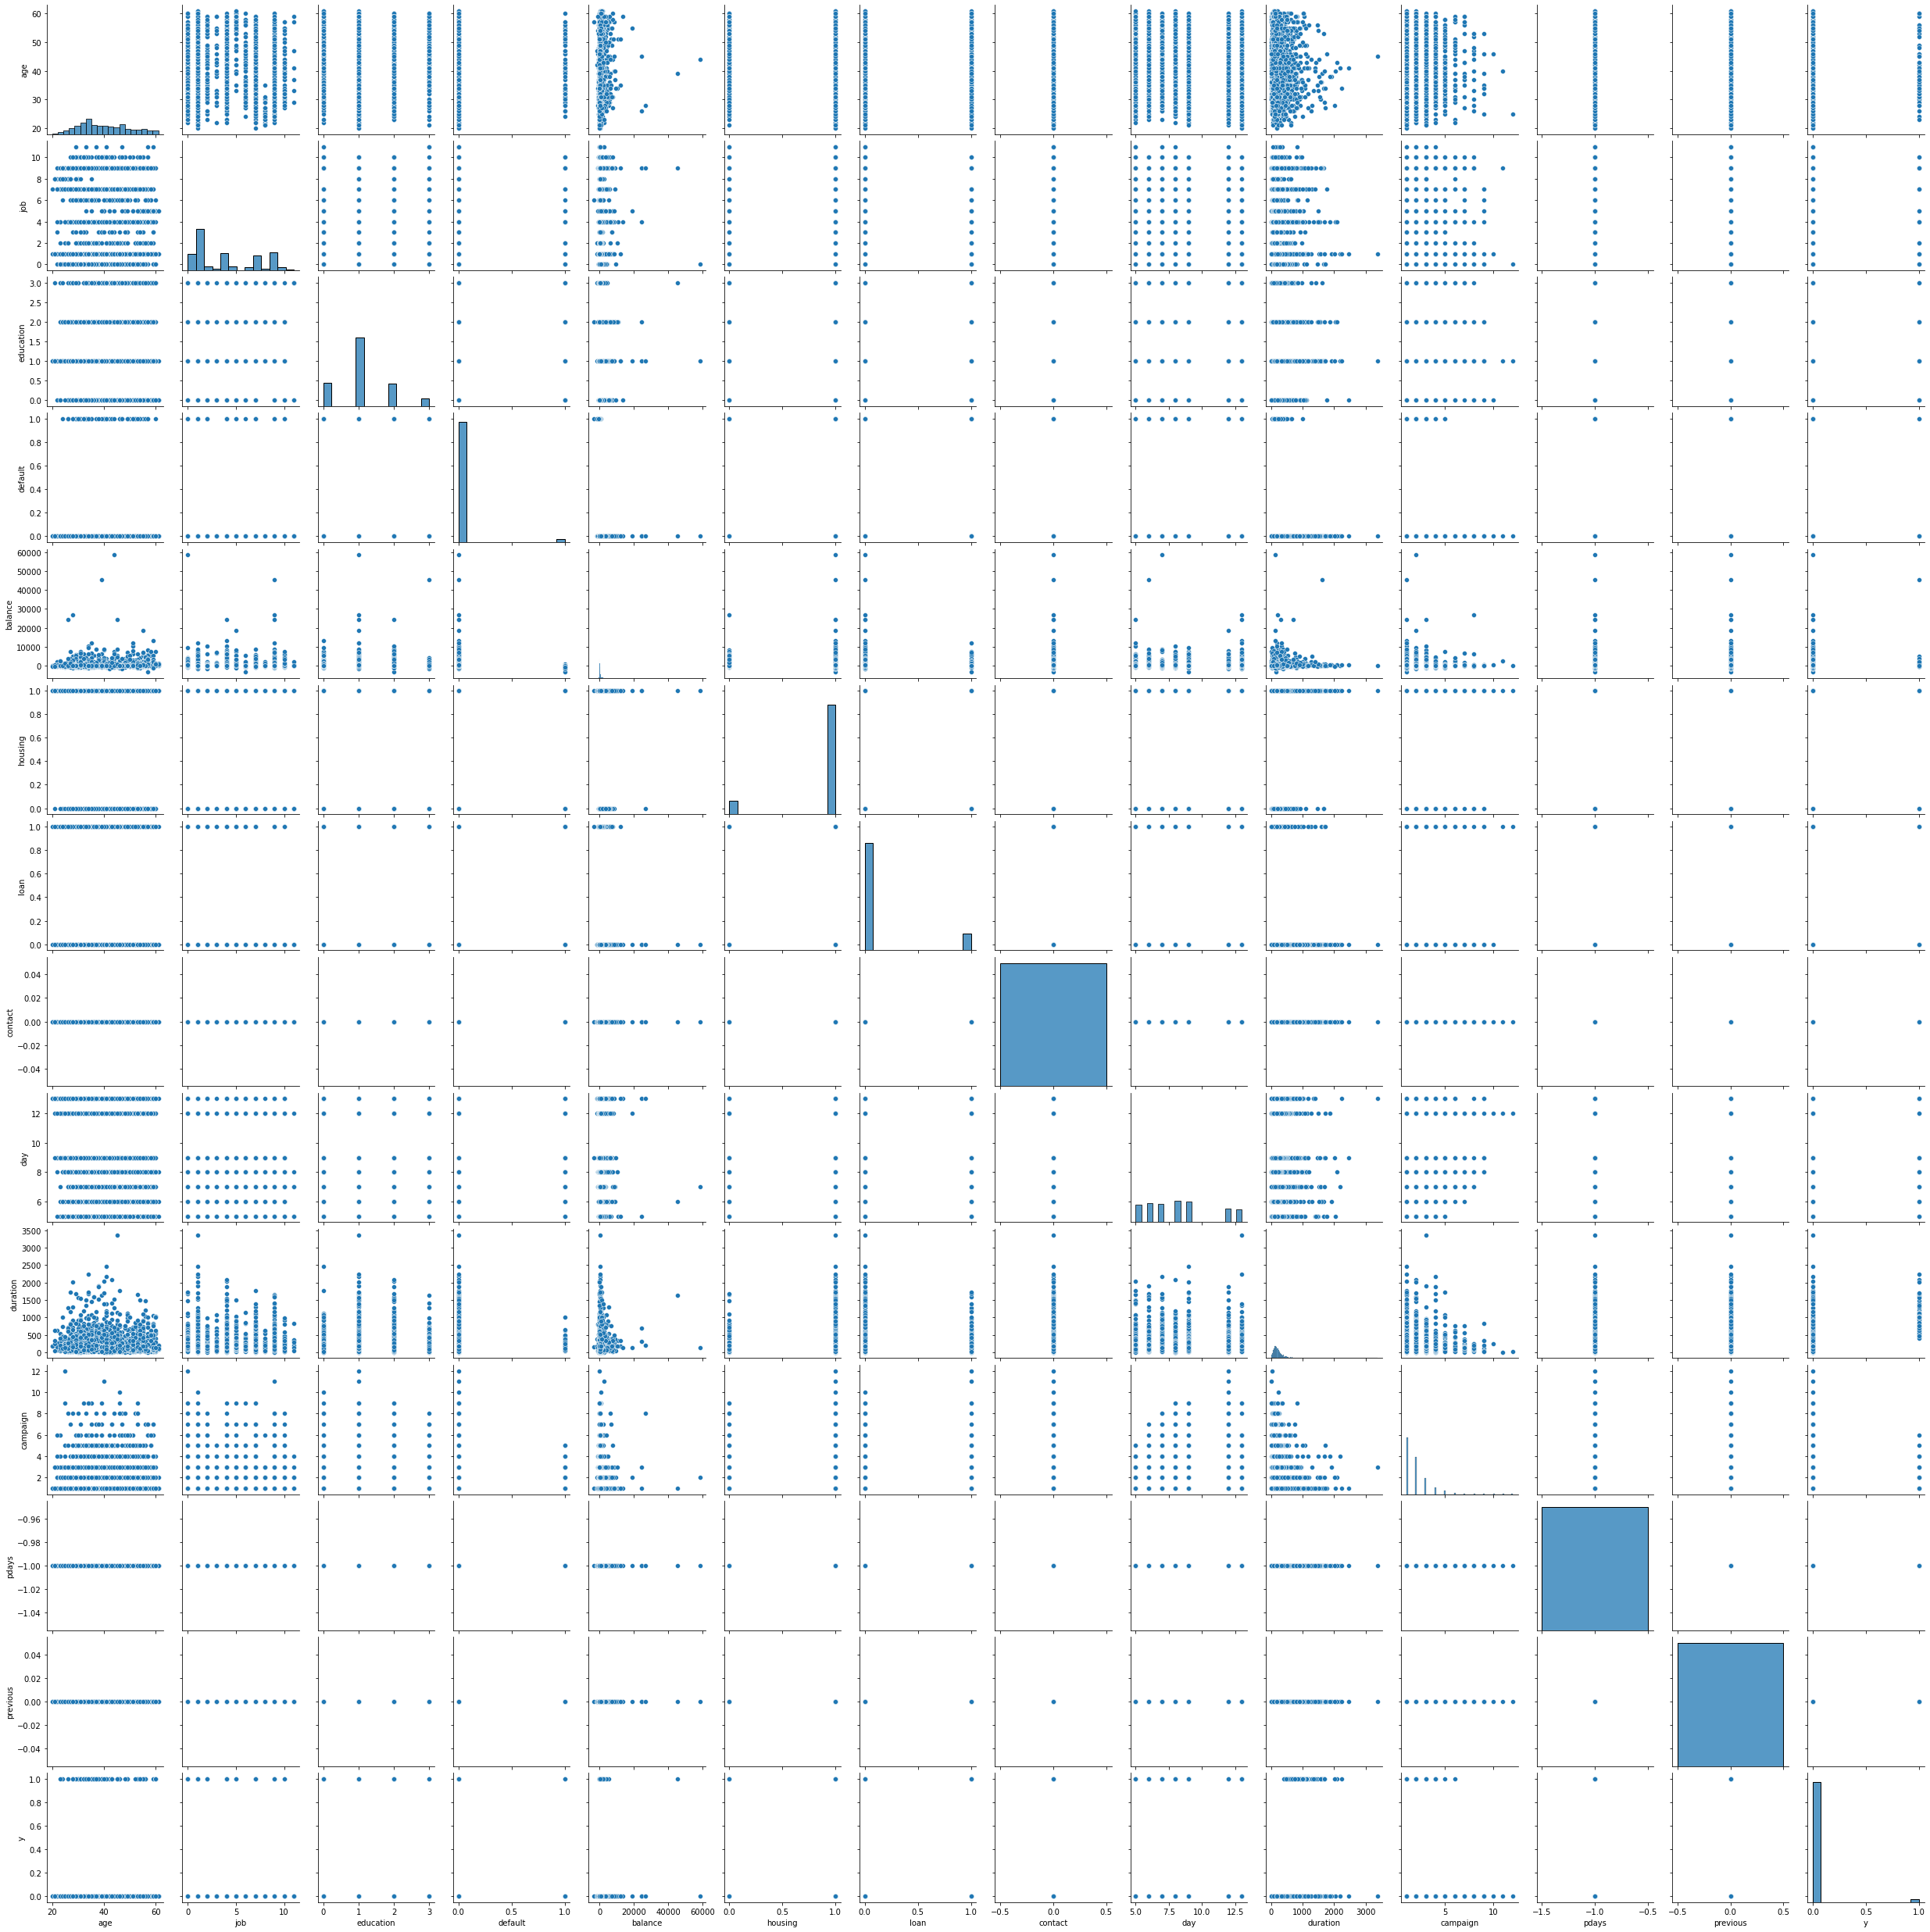

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

#### Model Building

In [14]:
# Dividing our data into input and output variables 
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
#print(X)
#print(Y)

In [15]:
# Python provides pickle modules for Serialization and de-Serialization 
from sklearn.linear_model import LogisticRegression
import pickle

In [16]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [17]:
# save the model to disk
filename = "finalized_model.sav"
pickle.dump(classifier, open(filename,'wb'))

In [18]:
#Predict for X dataset
pickle.load(open(filename,'rb'))
# classifier.read_pickle_file('/content/finalized_model.sav')
y_pred = classifier.predict(X)

In [19]:
y_pred_df = pd.DataFrame({'actual':Y, 'predicted_prob':classifier.predict(X)})

In [20]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2574,0,0
2575,0,0
2576,0,0
2577,0,0


#### Confusion Matrix for the model accuracy

In [21]:
# It is a table that is used in classification problems to assess where errors in the model were made.
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[2508   10]
 [  52    9]]


In [22]:
((39176+962)/(39176+746+4327+962))

0.8877927937891221

#### Classification Report

In [23]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2518
           1       0.47      0.15      0.23        61

    accuracy                           0.98      2579
   macro avg       0.73      0.57      0.61      2579
weighted avg       0.97      0.98      0.97      2579



#### ROC Curve

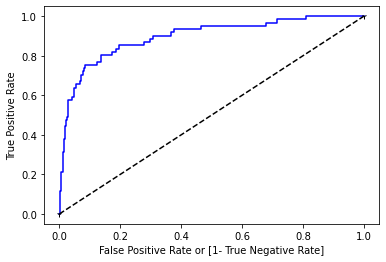

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
auc= roc_auc_score(Y,y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'blue', label='logit model(area = % 0.2f)' %auc)
plt.plot([0,1],[0,1], 'k--1')
plt.xlabel('False Positive Rate or [1- True Negative Rate]')
plt.ylabel("True Positive Rate")
plt.show()

In [28]:
auc

0.5717847888644383

### Ans: The model is good for predicting whether the client has subscribed a term deposit.